In [1]:
### 1. Importing library

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
### 2. Generating a Synthetic Dataset

In [5]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for binary classification

X, y = make_classification(n_samples= 1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

In [6]:
X

array([[-0.49693203, -0.33912228,  0.22914552, ..., -1.17927302,
         0.45780561,  0.35600629],
       [ 0.01249932,  1.00744397,  0.14009566, ..., -1.76385344,
         0.93791554,  0.45936344],
       [-0.72021202, -1.24448645, -0.47229097, ...,  0.41394755,
        -0.5387903 , -0.26636053],
       ...,
       [ 1.01027459, -0.13092581,  1.18030384, ..., -1.98959095,
        -0.80579965,  0.88702644],
       [-1.20775939, -0.3807634 ,  0.12906749, ..., -0.77725344,
         0.59910333,  0.22671772],
       [ 1.14356604, -0.42459817, -0.31394763, ...,  1.24769039,
        -0.30704834, -0.40246308]])

In [7]:
y

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [8]:
# Convert to DataFrame for convenience
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Display first few rows of the dataset
print(df.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.496932  -0.339122   0.229146  -0.182569  -1.041103   0.421546   
1   0.012499   1.007444   0.140096   2.868403  -2.123507  -1.280456   
2  -0.720212  -1.244486  -0.472291  -1.125655  -0.729670   1.010840   
3  -0.697364  -0.082698  -0.512911   1.138150   2.297500  -2.072355   
4  -0.202339  -1.553035  -0.090793  -0.183245   0.664007  -0.326614   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -1.015179   0.767666  -1.633819  -0.453981  ...    0.123134    0.977832   
1  -1.323388   1.420631  -2.725525  -1.325920  ...   -0.054783    1.852633   
2   0.733484   0.257335   0.028566  -1.091580  ...   -0.505305    0.411076   
3   2.256809  -1.697290   3.618918   0.993004  ...   -0.278493   -2.161010   
4   0.521091  -0.465061   0.939386   0.357189  ...   -0.026790   -0.599667   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    0.370061    0.266818  

In [9]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-0.496932,-0.339122,0.229146,-0.182569,-1.041103,0.421546,-1.015179,0.767666,-1.633819,-0.453981,...,0.123134,0.977832,0.370061,0.266818,0.153306,-0.320119,-1.179273,0.457806,0.356006,0
1,0.012499,1.007444,0.140096,2.868403,-2.123507,-1.280456,-1.323388,1.420631,-2.725525,-1.325920,...,-0.054783,1.852633,-1.254923,0.189480,0.277478,-0.199386,-1.763853,0.937916,0.459363,0
2,-0.720212,-1.244486,-0.472291,-1.125655,-0.729670,1.010840,0.733484,0.257335,0.028566,-1.091580,...,-0.505305,0.411076,0.449827,3.529055,0.039350,0.652697,0.413948,-0.538790,-0.266361,0
3,-0.697364,-0.082698,-0.512911,1.138150,2.297500,-2.072355,2.256809,-1.697290,3.618918,0.993004,...,-0.278493,-2.161010,1.136191,0.154032,-0.339092,0.716461,2.616592,1.334229,-0.791529,1
4,-0.202339,-1.553035,-0.090793,-0.183245,0.664007,-0.326614,0.521091,-0.465061,0.939386,0.357189,...,-0.026790,-0.599667,-1.403559,1.985380,-0.091821,0.127459,0.643637,2.254038,-0.181938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.324340,0.145836,0.369973,-0.532725,0.629300,-0.686279,-0.547309,-0.238503,0.044630,0.895783,...,0.400882,-0.370716,0.585299,-1.432671,-0.037956,-0.511153,-0.283798,0.819925,0.199276,1
996,-1.375634,0.474633,-1.384341,-0.473645,-1.028312,-0.455467,2.674701,0.043886,1.373125,-2.416668,...,-1.383980,0.267867,0.707592,0.244957,-0.021879,1.915874,1.992108,0.408136,-0.961234,0
997,1.010275,-0.130926,1.180304,-0.044361,0.461680,-0.176112,-2.476632,0.228120,-1.652703,1.767843,...,1.143690,0.121871,1.128240,0.082987,0.069945,-1.634519,-1.989591,-0.805800,0.887026,1
998,-1.207759,-0.380763,0.129067,0.809113,-0.747561,-0.698262,-0.647964,0.535489,-1.107383,-0.369325,...,0.055260,0.686759,-1.269465,0.124176,0.106264,-0.180706,-0.777253,0.599103,0.226718,0


In [10]:
### 3. Data Preprocessing

In [11]:
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [12]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,-0.496932,-0.339122,0.229146,-0.182569,-1.041103,0.421546,-1.015179,0.767666,-1.633819,-0.453981,-0.123733,0.123134,0.977832,0.370061,0.266818,0.153306,-0.320119,-1.179273,0.457806,0.356006
1,0.012499,1.007444,0.140096,2.868403,-2.123507,-1.280456,-1.323388,1.420631,-2.725525,-1.325920,0.184710,-0.054783,1.852633,-1.254923,0.189480,0.277478,-0.199386,-1.763853,0.937916,0.459363
2,-0.720212,-1.244486,-0.472291,-1.125655,-0.729670,1.010840,0.733484,0.257335,0.028566,-1.091580,-0.707552,-0.505305,0.411076,0.449827,3.529055,0.039350,0.652697,0.413948,-0.538790,-0.266361
3,-0.697364,-0.082698,-0.512911,1.138150,2.297500,-2.072355,2.256809,-1.697290,3.618918,0.993004,0.359055,-0.278493,-2.161010,1.136191,0.154032,-0.339092,0.716461,2.616592,1.334229,-0.791529
4,-0.202339,-1.553035,-0.090793,-0.183245,0.664007,-0.326614,0.521091,-0.465061,0.939386,0.357189,-0.083783,-0.026790,-0.599667,-1.403559,1.985380,-0.091821,0.127459,0.643637,2.254038,-0.181938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.324340,0.145836,0.369973,-0.532725,0.629300,-0.686279,-0.547309,-0.238503,0.044630,0.895783,0.514884,0.400882,-0.370716,0.585299,-1.432671,-0.037956,-0.511153,-0.283798,0.819925,0.199276
996,-1.375634,0.474633,-1.384341,-0.473645,-1.028312,-0.455467,2.674701,0.043886,1.373125,-2.416668,1.178253,-1.383980,0.267867,0.707592,0.244957,-0.021879,1.915874,1.992108,0.408136,-0.961234
997,1.010275,-0.130926,1.180304,-0.044361,0.461680,-0.176112,-2.476632,0.228120,-1.652703,1.767843,-0.875842,1.143690,0.121871,1.128240,0.082987,0.069945,-1.634519,-1.989591,-0.805800,0.887026
998,-1.207759,-0.380763,0.129067,0.809113,-0.747561,-0.698262,-0.647964,0.535489,-1.107383,-0.369325,-0.168300,0.055260,0.686759,-1.269465,0.124176,0.106264,-0.180706,-0.777253,0.599103,0.226718


In [13]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    0
999    1
Name: target, Length: 1000, dtype: int32

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
541,0.237830,-0.600339,-0.562892,0.479625,2.275485,1.048204,2.360520,-1.705373,3.686042,0.916405,0.003060,-0.327139,-2.164091,0.593539,-0.838176,-0.341750,0.785670,2.699116,0.584623,-0.828691
440,1.748137,0.587262,0.252460,1.040062,-0.191725,0.982683,-0.667010,0.234623,-0.690791,0.173340,0.082833,0.219221,0.271186,-0.205628,-1.400071,0.050855,-0.350331,-0.629279,-0.728172,0.236946
482,-1.075650,-0.682075,0.088677,0.336583,0.066475,-0.117981,-0.171048,-0.003198,-0.087256,0.155231,-0.484629,0.088707,-0.017669,1.152349,-1.156996,0.001327,-0.122724,-0.127185,0.143418,0.061476
422,-0.039894,-1.073689,0.268350,-1.404240,1.121730,-1.029972,-0.082576,-0.598602,0.804871,1.118772,-0.480648,0.348961,-0.830290,0.081083,0.046079,-0.109740,-0.369109,0.260734,2.539382,0.036399
778,0.789920,-0.385673,0.077522,0.969569,0.284810,-0.739771,-0.042399,-0.147823,0.186951,0.295531,0.240206,0.097377,-0.206745,0.434503,-1.334611,-0.026853,-0.106727,0.047802,1.253133,0.016894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.317761,0.249451,1.015735,0.116579,1.009762,-0.147340,-1.841883,-0.195499,-0.711112,1.953148,2.492184,1.037797,-0.411941,0.399228,0.963925,-0.015489,-1.405108,-1.282655,-0.275121,0.663796
270,-0.550587,-1.137033,-0.610611,0.509689,-1.366894,0.491446,0.748150,0.603648,-0.454848,-1.709867,1.302590,-0.690339,0.888860,-0.821815,-0.229081,0.103210,0.842808,0.238153,0.137662,-0.275527
860,1.897767,-1.372859,0.206854,-0.947893,-1.863607,1.194763,-1.352985,1.283971,-2.547540,-1.061106,-1.978225,0.030353,1.662245,0.351480,0.894647,0.252545,-0.291258,-1.712425,0.046935,0.471533
435,-0.281845,-1.979019,0.265890,-0.636876,-0.784114,-0.977939,-0.977625,0.619556,-1.403555,-0.227896,0.862755,0.179960,0.776894,2.026817,-0.612423,0.125503,-0.370405,-1.071060,-0.830070,0.344184


In [16]:
X_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
521,1.562889,0.951449,0.179797,-0.273993,-1.746845,1.246892,-1.236030,1.197273,-2.361785,-1.011849,-1.703872,0.015275,1.551990,-0.366507,-0.062004,0.235205,-0.253474,-1.577506,-0.924466,0.430499
737,0.718417,1.481961,0.546922,-0.157747,1.045959,0.246084,-0.754405,-0.426579,0.200298,1.405771,-0.565576,0.602732,-0.645637,-0.283218,-0.802280,-0.070404,-0.755339,-0.338402,-0.471316,0.275781
740,0.314972,-0.216827,-0.115282,0.214983,0.573120,0.264482,0.534053,-0.417778,0.879266,0.263186,0.501900,-0.057632,-0.533584,-0.292758,0.063702,-0.083225,0.161172,0.627895,-0.028817,-0.187127
660,2.529928,2.441222,-0.634941,-0.993593,-1.019536,1.871074,0.967854,0.370637,-0.006391,-1.494703,0.092055,-0.682699,0.585198,0.437127,-0.850884,0.057668,0.877381,0.529450,0.476240,-0.351821
411,0.781943,0.536389,-0.437732,-0.065410,1.999606,1.177001,1.944385,-1.473372,3.133603,0.874851,-0.838362,-0.234275,-1.877054,-1.671147,-1.312467,-0.294192,0.611543,2.260323,-1.212657,-0.681829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,-0.900590,1.369701,0.895037,-1.132785,0.945621,-0.350849,-1.596624,-0.207996,-0.561765,1.760432,1.255404,0.919362,-0.410117,-1.086055,-2.218348,-0.020549,-1.238004,-1.091073,0.945870,0.575841
935,-0.233898,0.994352,-0.234701,-0.196093,-0.740875,-0.215114,0.185734,0.369877,-0.425038,-0.809141,-0.499872,-0.284194,0.523486,0.902271,1.542277,0.066298,0.323418,-0.059584,0.543032,-0.070878
428,0.012829,0.526537,-0.031288,0.479827,-0.161470,0.990166,-0.004873,0.089423,-0.129471,-0.152074,-0.649827,-0.043370,0.122699,-0.477411,-0.217131,0.016587,0.042960,-0.051919,0.084168,0.000744
7,0.175287,1.695723,0.222949,-1.336725,-0.636525,0.018819,-0.809836,0.506092,-1.152549,-0.176317,0.156694,0.152729,0.633743,1.897289,-1.171654,0.102645,-0.310533,-0.883388,1.023531,0.285192


In [17]:
y_train

541    1
440    1
482    1
422    1
778    1
      ..
106    1
270    0
860    0
435    1
102    1
Name: target, Length: 700, dtype: int32

In [18]:
y_test

521    0
737    0
740    1
660    0
411    1
      ..
468    1
935    0
428    1
7      0
155    0
Name: target, Length: 300, dtype: int32

In [19]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 0.24202289, -0.6359924 , -0.90387474, ...,  2.1836247 ,
         0.54188843, -1.76216483],
       [ 1.69911428,  0.5517888 ,  0.39060034, ..., -0.49598944,
        -0.76129353,  0.48923309],
       [-1.02517628, -0.71774093,  0.13057392, ..., -0.09176475,
         0.10391382,  0.11851281],
       ...,
       [ 1.84347198, -1.40863036,  0.31819544, ..., -1.36800586,
         0.00813758,  0.98485115],
       [-0.25934062, -2.01488154,  0.41192285, ..., -0.8516571 ,
        -0.86244598,  0.71579897],
       [-0.43366214, -0.78630335, -1.26121293, ...,  2.74705899,
        -1.40346987, -2.27644802]])

In [21]:
X_test_scaled

array([[ 1.52039326,  0.9160309 ,  0.27523949, ..., -1.25938545,
        -0.95615027,  0.89815855],
       [ 0.70567711,  1.44662286,  0.85809606, ..., -0.26181103,
        -0.50631817,  0.57128073],
       [ 0.31644708, -0.25242262, -0.1932371 , ...,  0.51613272,
        -0.06705924, -0.40671512],
       ...,
       [ 0.02494996,  0.49105386, -0.05988506, ..., -0.03117043,
         0.04509827, -0.0097968 ],
       [ 0.18168384,  1.66041739,  0.34374837, ..., -0.70056659,
         0.97758223,  0.59116544],
       [ 0.34706689, -1.14731153,  0.51479167, ..., -0.4009621 ,
        -1.59483248,  0.49106882]])

In [22]:
### 4. Building the Logistic Regression Model

In [23]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
### 5. Making Predictions

In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [26]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [27]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [28]:
y_pred_proba

array([2.67006041e-02, 9.24112567e-01, 8.00542045e-01, 6.81316145e-02,
       9.82824378e-01, 4.90233746e-02, 8.84918383e-02, 6.18584252e-01,
       3.85380875e-02, 3.78207382e-01, 3.36014451e-01, 9.99749307e-01,
       8.61872642e-02, 3.96519971e-01, 1.41728340e-01, 8.97024247e-01,
       1.74303066e-01, 9.92692114e-01, 9.51766921e-01, 9.64152139e-01,
       7.79803302e-01, 8.41023853e-01, 9.99296964e-01, 9.72647338e-05,
       1.97082353e-01, 5.30114464e-02, 4.89025076e-01, 1.32910165e-01,
       6.40230820e-01, 5.59782711e-01, 9.60145233e-01, 8.11462218e-02,
       2.63765362e-01, 1.14940885e-01, 8.99962413e-01, 1.35156855e-01,
       2.85404613e-01, 9.99314167e-01, 7.32985342e-01, 1.15770027e-01,
       9.74414287e-01, 3.69432194e-02, 8.14930387e-01, 9.91902291e-01,
       6.74709901e-03, 9.99848895e-01, 9.87182492e-01, 9.91947840e-02,
       5.99700578e-01, 4.16706947e-01, 1.32674505e-02, 4.17469681e-01,
       5.76050838e-01, 9.77217486e-01, 9.92520285e-02, 2.50861221e-01,
      

In [29]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [30]:
### 6. Model Evaluation3

In [31]:
#### 6.1. Accuracy

Accuracy is the ratio of correctly predicted instances to the total instances. It is a basic metric that gives an overall idea of the model performance.

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84


In [ ]:
0 1
1 1
1 1
1 0
0 0
0 1
1 0
0 0
1 0

In [33]:
#### 6.2. Confusion Matrix

The confusion matrix is a table that is used to describe the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives.

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[135  27]
 [ 21 117]]


In [35]:
#### 6.3. Classification Report

The classification report provides a detailed breakdown of the precision, recall, F1-score, and support for each class.

In [36]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       162
           1       0.81      0.85      0.83       138

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [37]:
#### 6.4. ROC-AUC Score

the ROC-AUC score measures the area under the receiver operating characteristic curve. It provides an aggregate measure of performance across all classification thresholds.

In [38]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.904320987654321


In [39]:
#### 6.5. ROC Curve

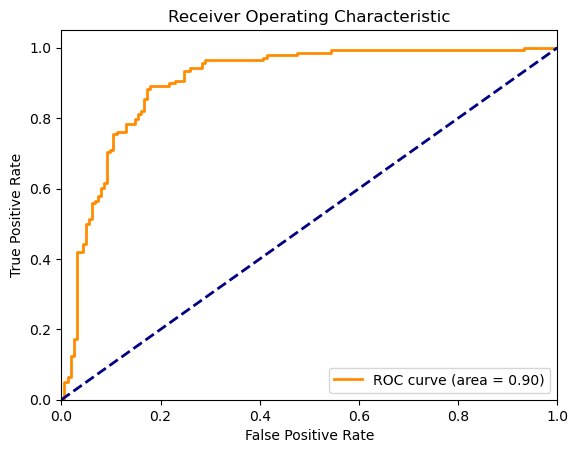

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()